<a href="https://colab.research.google.com/github/ElzodQurashev/toshkent_uy_narxlari/blob/main/Diabet_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Vazifa**

Quyidagi ma’lumotlar to’plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o’lchovlar asosida bemorda diabet bor-yo’qligini taxmin qilishdir.

**Tarkib**

Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.

**Ustunlar**

* Pregnancies: homilador bo’lish soni
* Glucose: glyukozaga test natijasi
* BloodPressure: diastolik qon bosimi (mm Hg)
* SkinThickness: Triceps teri burmasining qalinligi (mm)
* Insulin: 2 soatlik sarum insulini (mu U/ml)
* BMI: Tana massasi indeksi (vazn kg / (m bo’yi) ^ 2)
* DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
* Age: Yosh (yil)
* Outcome: Class (0 – diabet yo’q, 1 – diabet)
* Dataset: https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, jaccard_score

In [ ]:
url = "https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv?raw=true"
df = pd.read_csv(url)
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
599,1,109,38,18,120,23.1,0.407,26,0
619,0,119,0,0,0,32.4,0.141,24,1
521,3,124,80,33,130,33.2,0.305,26,0
195,5,158,84,41,210,39.4,0.395,29,1
457,5,86,68,28,71,30.2,0.364,24,0
475,0,137,84,27,0,27.3,0.231,59,0
711,5,126,78,27,22,29.6,0.439,40,0
574,1,143,86,30,330,30.1,0.892,23,0
434,1,90,68,8,0,24.5,1.138,36,0
3,1,89,66,23,94,28.1,0.167,21,0


# **Tahlil**

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
df.corrwith(df['Outcome']).sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
dtype: float64

In [ ]:
# Ahamiyatsiz korrelyatsiyaga ega ustunlarni tashlab yuboramiz
df.drop(['SkinThickness','BloodPressure'], axis=1, inplace=True)

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.331357,0.221071,0.137337,0.263514,0.466581
Insulin,-0.073535,0.331357,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.130548,0.292695,0.173844,0.238356,1.000000


# **ML ga tayyorlash**

In [ ]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].copy()

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[ 0.63994726,  0.84832379, -0.69289057,  0.20401277,  0.46849198,
         1.4259954 ],
       [-0.84488505, -1.12339636, -0.69289057, -0.68442195, -0.36506078,
        -0.19067191],
       [ 1.23388019,  1.94372388, -0.69289057, -1.10325546,  0.60439732,
        -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.27959377, -0.73518964, -0.68519336,
        -0.27575966],
       [-0.84488505,  0.1597866 , -0.69289057, -0.24020459, -0.37110101,
         1.17073215],
       [-0.84488505, -0.8730192 , -0.69289057, -0.20212881, -0.47378505,
        -0.87137393]])

# **Eng yaxshi "k" (qo'shnilar) ni topip olamiz**

## **`for` sikli yordamida**

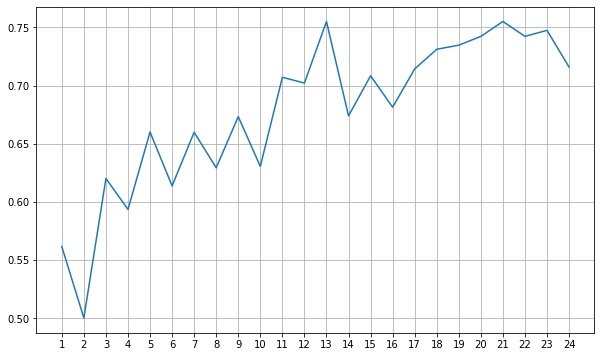

In [ ]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid(which='major')
plt.show()

In [ ]:
param_grid = {'n_neighbors' : np.arange(1,25)}
knn_gscv = GridSearchCV(knn, param_grid,cv=5)
knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 20, 22, 21, 18, 16, 19, 16, 15, 12, 13, 11, 13, 10,  9,  8,
        7,  4,  5,  1,  3,  2,  6], dtype=int32)

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 21}

In [ ]:
knn_gscv.best_score_

0.7774467362702657

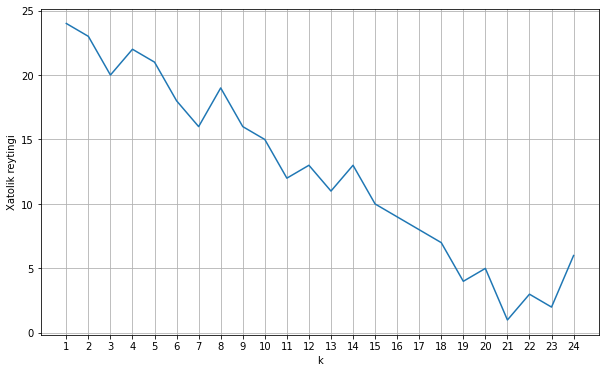

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel('k')
plt.ylabel('Xatolik reytingi')
plt.grid()
plt.show()

# **ML**

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=23)

# k-NN
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_predict = knn.predict(X_test)

# **Baholash**

**Jaccard index**

In [ ]:
jaccard_score(y_predict, y_test)

0.49230769230769234

**Confusion matrix**

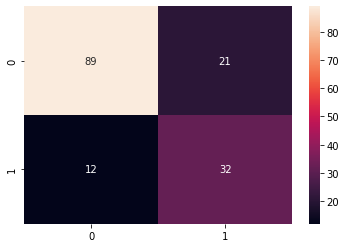

In [ ]:
sns.heatmap(confusion_matrix(y_predict, y_test), annot=True)
plt.show()

In [ ]:
confusion_matrix(y_test, y_predict)

array([[89, 12],
       [21, 32]])

# **Precision, recall, F1**

---


In [ ]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"precisin = {precision}\nrecall = {recall}\nf1 = {f1}\naccuracy = {accuracy}")

precisin = 0.7272727272727273
recall = 0.6037735849056604
f1 = 0.6597938144329897
accuracy = 0.7857142857142857


In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       101
           1       0.73      0.60      0.66        53

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



# **Cross-validation yordamida tekshiramiz**

In [ ]:
# Cross validation
predict = cross_val_predict(estimator = knn, X=X, y=y, cv=5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       500
           1       0.66      0.57      0.61       268

    accuracy                           0.75       768
   macro avg       0.72      0.71      0.71       768
weighted avg       0.74      0.75      0.74       768



## **Grid Search yordamida**

# **Qayta ishlash - df2**

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Avval predict qilinadigan ustun ma'lumotlarini tenglashtirib olamiz**

In [ ]:
500-268    # demak 0 qimatli 232 ta ustunni tashlab yuborsak ma'lumotlar tenglashar ekan
           # ! qo'shimcha ma'lumot yig'ishning iloji yoq

232

In [ ]:
df[df['Outcome']==0]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,0,26.6,0.351,31,0
3,1,89,94,28.1,0.167,21,0
5,5,116,0,25.6,0.201,30,0
7,10,115,0,35.3,0.134,29,0
10,4,110,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...
762,9,89,0,22.5,0.142,33,0
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0


In [ ]:
df[df['Outcome']==0].iloc[list(range(0,232))].index

Int64Index([  1,   3,   5,   7,  10,  12,  18,  20,  21,  27,
            ...
            361, 362, 364, 365, 367, 368, 371, 372, 373, 374],
           dtype='int64', length=232)

In [ ]:
indeks = df[df['Outcome']==0].iloc[list(range(0,232))].index

In [ ]:
df2 = df.drop(indeks)

In [ ]:
df2['Outcome'].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

## **ML**

In [ ]:
X = df2.drop('Outcome', axis=1).values
y = df2['Outcome']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[ 0.56425499,  0.70112178, -0.72445097,  0.11219962,  0.3892931 ,
         1.3317352 ],
       [ 1.1327525 ,  1.78994997, -0.72445097, -1.21137231,  0.52180064,
        -0.18075229],
       [-1.14123753,  0.35891863,  0.70333106,  1.33296985,  5.28029377,
        -0.09672521],
       ...,
       [ 0.28000624, -0.1388314 ,  0.22740372, -0.83871614, -0.73554872,
        -0.34880645],
       [-0.85698878,  0.01671549, -0.72445097, -0.33755783, -0.42930906,
         1.07965395],
       [-0.85698878, -1.00989395, -0.72445097, -0.29900719, -0.52942587,
        -0.93699603]])

**eng yaxshi 'k' ni aniqlab olamiz**

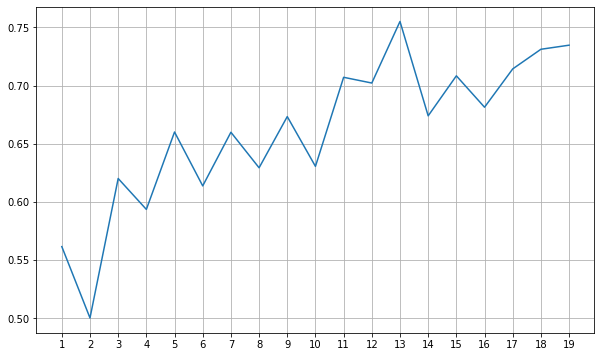

In [ ]:
f1 = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),f1)
plt.xticks(range(1,20))
plt.grid(which='both')
plt.minorticks_on
plt.show()

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=23)

# k-NN
knn = KNeighborsClassifier(n_neighbors = 9)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_predict = knn.predict(X_test)

In [ ]:

jaccard_score(y_predict, y_test)

0.5757575757575758

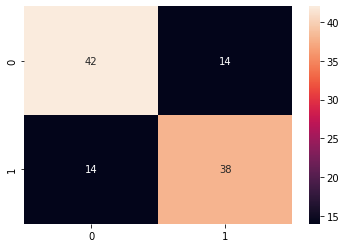

In [ ]:
sns.heatmap(confusion_matrix(y_predict, y_test), annot=True)
plt.show()